In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('black_friday_data_kaggle.csv', error_bad_lines=False)
df.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,-1,NaN,NaN,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,-1,NaN,NaN,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,-1,14.0,NaN,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
len(df.columns)

13

In [3]:
# NaN as 0 for product category 2,3
# There are total 3623 different products
# There are total 5891 different users
# There are total 7 different age ranges (0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+)
# There are total 21 different occupation
# There are total 3 different city categories (A,B,C)
# There are total 5 different city staying (0,1,2,3,4+)
# There are total 18 different product categories1
# There are total 17 different product categories2
# There are total 15 different product categories3
# 166986 NaN values in Product Category 2, 373299 NaN values in Product Cat 3

# For Gender, F:0, M:1
# For City Category, A:0, B:1, C:2
# For Age, 0-17:0, 18-25:1, 26-35:2, 36-45:3, 46-50:4, 51-55:5, 55+:6
# For staying, 0:0, 1:1, 2:2, 3:3, 4+:4

In [5]:
df.fillna(0, inplace=True)
df.Product_Category_2 = df.Product_Category_2.astype(int)
df.Product_Category_3 = df.Product_Category_3.astype(int)

le = LabelEncoder()
df['User_ID'] = le.fit_transform(df['User_ID'])
# df['Product_ID'] = le.fit_transform(df['Product_ID'])
df['Age'] = le.fit_transform(df['Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['City_Category'] = le.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'])
df=df.drop('Unnamed: 0', axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,P00069042,0,0,10,0,2,0,-1,0,0,8370
1,0,P00248942,0,0,10,0,2,0,1,6,14,15200
2,0,P00087842,0,0,10,0,2,0,-1,0,0,1422
3,0,P00085442,0,0,10,0,2,0,-1,14,0,1057
4,1,P00285442,1,6,16,2,4,0,8,0,0,7969


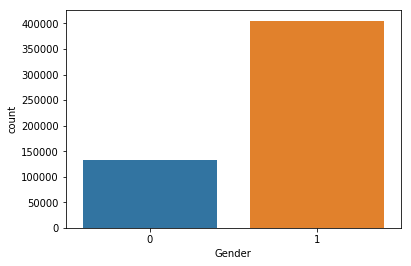

Female percentage is:  24.59 %  and male percentage is:  75.41 %


In [6]:
sns.countplot(df['Gender'])
plt.show()
print('Female percentage is: ',
      round(df.groupby('Gender').count().iloc[:, 0][0] /
            df.groupby('Gender').count().iloc[:, 0].sum() * 100, 2), '%',
      ' and male percentage is: ',
      round(df.groupby('Gender').count().iloc[:, 0][1] /
            df.groupby('Gender').count().iloc[:, 0].sum() * 100, 2), '%')

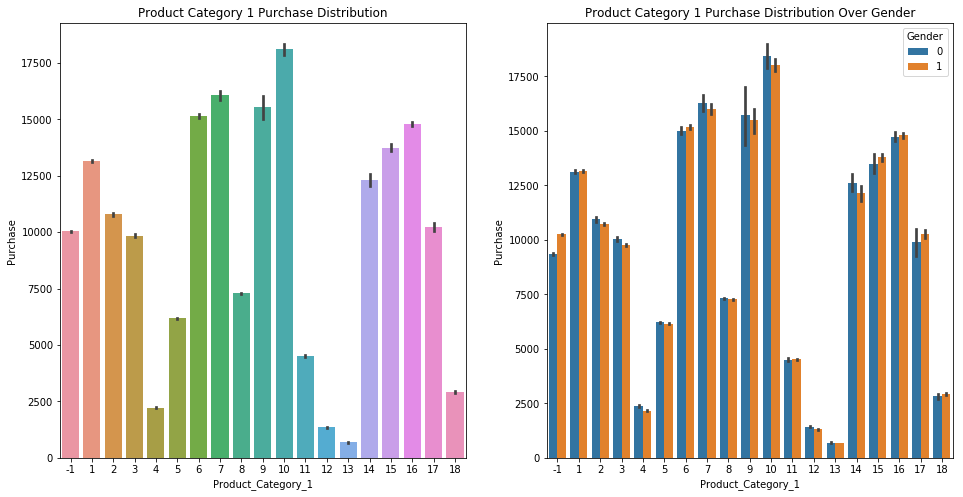

In [8]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.barplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Product Category 1 Purchase Distribution')
plt.subplot(122)
sns.barplot(x='Product_Category_1', y='Purchase', data=df, hue='Gender')
plt.title('Product Category 1 Purchase Distribution Over Gender')
plt.show()

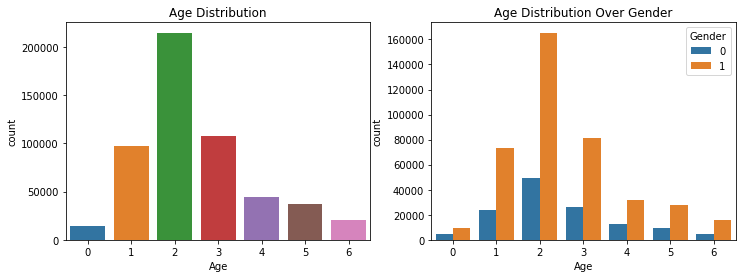

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.subplot(122)
sns.countplot(df['Age'], hue=df['Gender'])
plt.title('Age Distribution Over Gender')
plt.show()

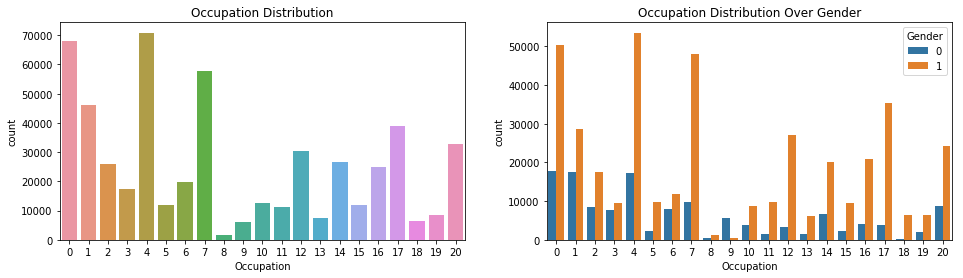

In [17]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.countplot(df['Occupation'])
plt.title('Occupation Distribution')
plt.subplot(122)
sns.countplot(df['Occupation'], hue=df['Gender'])
plt.title('Occupation Distribution Over Gender')
plt.show()

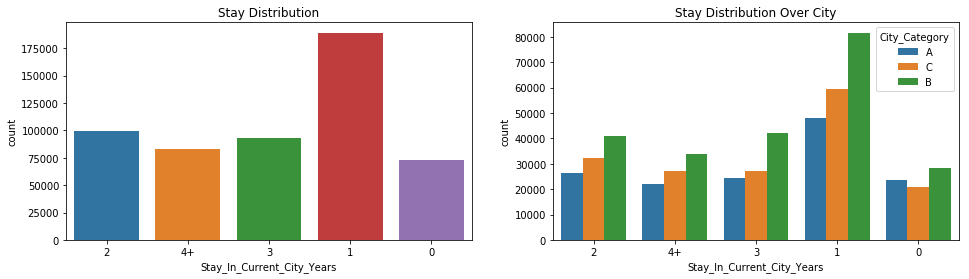

In [5]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.countplot(df['Stay_In_Current_City_Years'])
plt.title('Stay Distribution')
plt.subplot(122)
sns.countplot(df['Stay_In_Current_City_Years'], hue=df['City_Category'])
plt.title('Stay Distribution Over City')
plt.show()

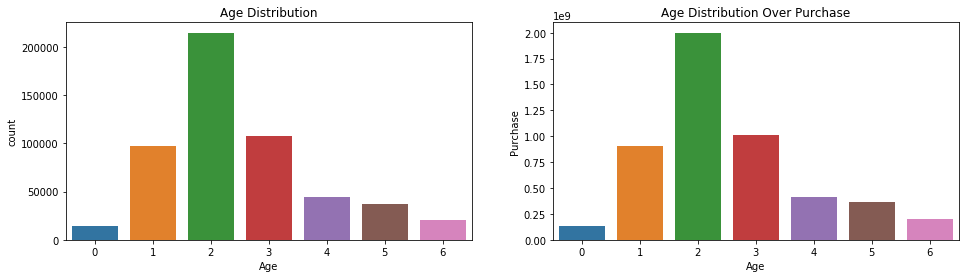

In [11]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.subplot(122)
sns.barplot(x='Age', y='Purchase', data=df.groupby(
    'Age', as_index=False).sum())
plt.title('Age Distribution Over Purchase')
plt.show()

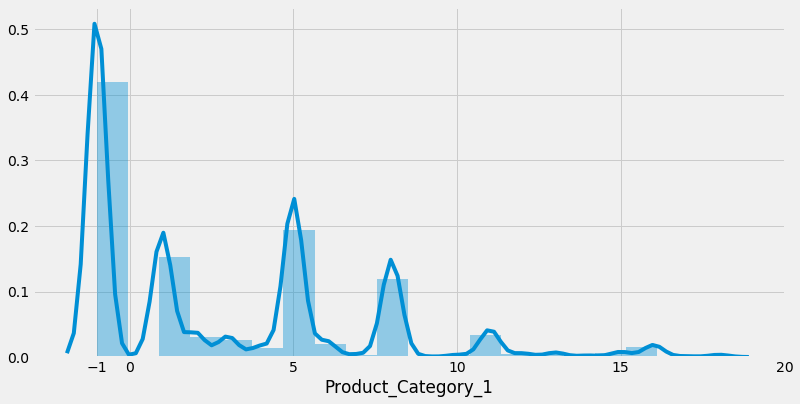

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.distplot(df.Product_Category_1, bins = 20)
plt.xticks([-1, 0, 5, 10, 15, 20])
plt.show()

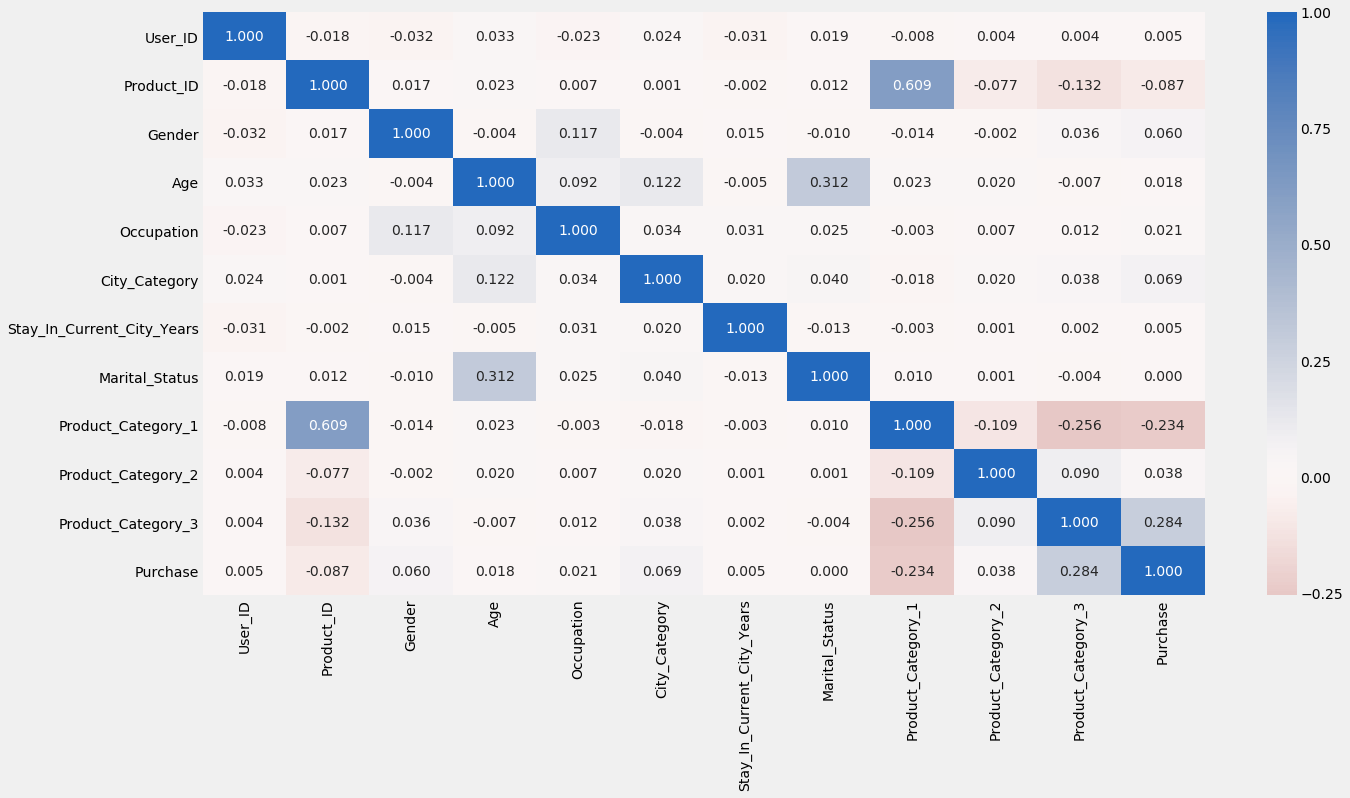

In [13]:
df1 = df.copy()
df1['Product_ID'] = le.fit_transform(df1['Product_ID'])

plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()